In [16]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x = torch.randn(100, 2)
y = ((x[:, 0]> 0.5) & (x[:, 1] > 0.5)).float()

# print(x, y)

In [18]:
class LogisticReg(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticReg, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        
        return F.sigmoid(out)
    

model = LogisticReg(input_dim=2, output_dim=1)

print(model)

LogisticReg(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


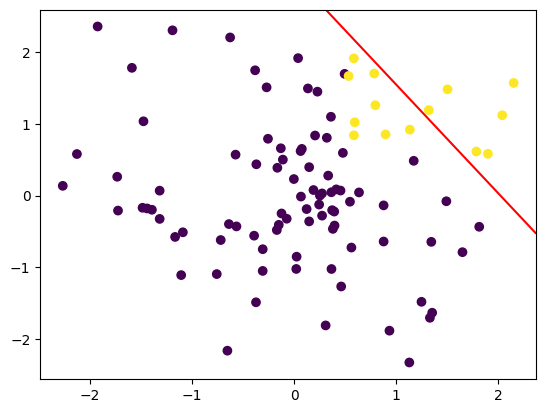

In [19]:
# model training, decision boundary
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000) :
    y_pred = model(x)
    loss = criterion(y_pred.squeeze(), y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
plt.scatter(x[:,0 ], x[:, 1], c=y)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
"""
np.meshgrid() -> generate grid point 
xx, yy -> 2d array
"""

z = model(torch.tensor(np.c_[xx.ravel(),yy.ravel()], dtype= torch.float32)).detach().numpy()
"""
xx, yy -> np.c_[] : connect xx, yy -> modify torch.tensor and ravel() -> 2d array to 1d -> converted input -> send to model
->
"""
    
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, levels=[0.5], colors='r')



Softmax Function Logistic Reg

In [22]:
#import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [27]:
iris = load_iris()
# print(iris)
x= iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=777)
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [28]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

In [29]:
class SoftmaxReg(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxReg, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        out = self.linear(x)
        
        return out
    
    


In [30]:
input_size = 4
num_classes = 3
lr = 0.01
num_epoch = 100

In [ ]:
model = SoftmaxReg(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)